In [92]:
!pip install gcsfs

     |████████████████████████████████| 118 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 152 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 648 kB 63.6 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 51.5 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 146 kB 6.3 MB/s eta 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.7.4
    Uninstalling fsspec-0.7.4:
      Successfully uninstalled fsspec-0.7.4


In [93]:

import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import random
import math
import cmath

pi2 = cmath.pi * 2.0

def DFT(fnList):
    N = len(fnList)
    FmList = []
    
    for m in range(N):
        Fm = 0.0
        for n in range(N):
            Fm += fnList[n] * cmath.exp(- 1j * pi2 * m * n / N)
        FmList.append(Fm / N)
    return FmList
        
def InverseDFT(FmList):
    N = len(FmList)
    fnList = []
    for n in range(N):
        fn = 0.0
        for m in range(N):
            fn += FmList[m] * cmath.exp(1j * pi2 * m * n / N)
        fnList.append(fn)
    return fnList

# TEST
print("Input Sine Wave Signal:")
N = 360 # degrees (Number of samples)
a = float(random.randint(1, 100))
f = float(random.randint(1, 100))
p = float(random.randint(0, 360))
print ("frequency = " + str(f))
print ("amplitude = " + str(a))
print ("phase ang = " + str(p))


fnList = []
for n in range(N):
    t = float(n) / N * pi2
    fn = a * math.sin(f * t + p / 360 * pi2)
    fnList.append(fn)

print("DFT Calculation Results:")
FmList = DFT(fnList)
threshold = 0.001
for (i, Fm) in enumerate(FmList):
    if abs(Fm) > threshold:
        print ("frequency = " + str(i))
        print ("amplitude = " + str(abs(Fm) * 2.0))
        p = int(((cmath.phase(Fm) + pi2 + pi2 / 4.0) % pi2) / pi2 * 360 + 0.5)
        print ("phase ang = " + str(p))

### Recreate input signal from DFT results and compare to input signal
##fnList2 = InverseDFT(FmList)
##for n in range(N):
##    print fnList[n], fnList2[n].real

Input Sine Wave Signal:
frequency = 98.0
amplitude = 43.0
phase ang = 69.0
DFT Calculation Results:
frequency = 98
amplitude = 42.99999999999993
phase ang = 69
frequency = 262
amplitude = 42.99999999999998
phase ang = 111


In [94]:
GCS_DS_PATH = "gs://kds-3e72e6682f329290f88dc99bf3e23068847f299afced96dfcd6902a3"

In [75]:

df_sample_submission = pd.read_csv('/Users/jinhanhan/Documents/python/data_science/sample_submission.csv')
df_training_labels = pd.read_csv('/Users/jinhanhan/Documents/python/data_science/training_labels.csv')
data = [['sample',0.5]]
df_real_submission = pd.DataFrame(data, columns = ['id', 'target'])

In [76]:
print(df_real_submission)

       id  target
0  sample     0.5


In [65]:
print(df_training_labels)

                id  target
0       00000e74ad       1
1       00001f4945       0
2       0000661522       0
3       00007a006a       0
4       0000a38978       1
...            ...     ...
559995  ffff9a5645       1
559996  ffffab0c27       0
559997  ffffcf161a       1
559998  ffffd2c403       0
559999  fffff2180b       0

[560000 rows x 2 columns]


In [66]:
targets = df_training_labels["target"]

In [46]:
targets

0         1
1         0
2         0
3         0
4         1
         ..
559995    1
559996    0
559997    1
559998    0
559999    0
Name: target, Length: 560000, dtype: int64

In [43]:
print(df_training_labels["id"])

0         00000e74ad
1         00001f4945
2         0000661522
3         00007a006a
4         0000a38978
             ...    
559995    ffff9a5645
559996    ffffab0c27
559997    ffffcf161a
559998    ffffd2c403
559999    fffff2180b
Name: id, Length: 560000, dtype: object


In [47]:
print(df_sample_submission)

                id  target
0       00005bced6     0.5
1       0000806717     0.5
2       0000ef4fe1     0.5
3       00020de251     0.5
4       00024887b5     0.5
...            ...     ...
225995  ffff4125f1     0.5
225996  ffff9d32a6     0.5
225997  ffff9f4c1f     0.5
225998  ffffa19693     0.5
225999  ffffebbfe2     0.5

[226000 rows x 2 columns]


In [49]:
print(df_sample_submission['id'])

0         00005bced6
1         0000806717
2         0000ef4fe1
3         00020de251
4         00024887b5
             ...    
225995    ffff4125f1
225996    ffff9d32a6
225997    ffff9f4c1f
225998    ffffa19693
225999    ffffebbfe2
Name: id, Length: 226000, dtype: object


In [60]:
kaggle competitions download -c g2net-gravitational-wave-detection

SyntaxError: invalid syntax (<ipython-input-60-f7826f146c9a>, line 1)

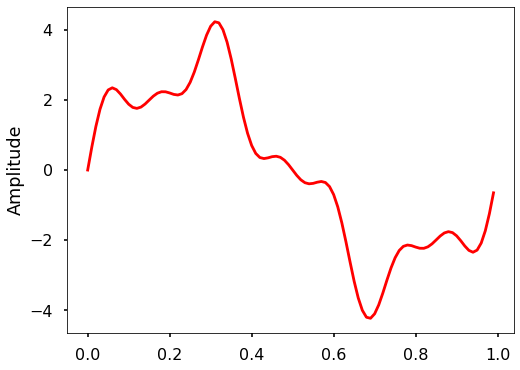

In [50]:
import matplotlib.pyplot as plt
import numpy as np


#this data is used for other functions, dft or fft

plt.style.use('seaborn-poster')
%matplotlib inline

# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [ ]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [52]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

In [56]:
from scipy.fftpack import fftfreq
from numpy.fft import fft, ifft

/Users/jinhanhan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


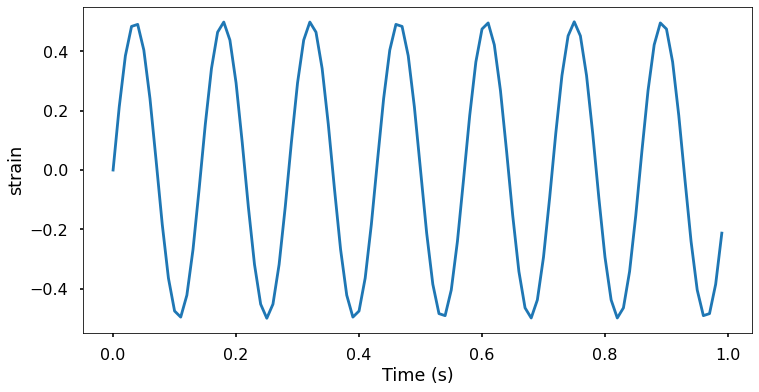

<ipython-input-78-4175c397b7b3>:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, np.abs(sig_fft), 'b', \
<ipython-input-78-4175c397b7b3>:43: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, np.abs(sig_fft_filtered), 'b', \


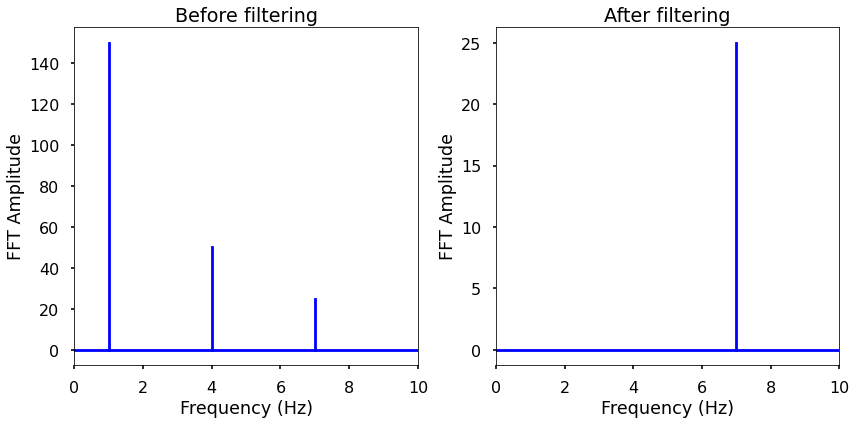

In [78]:
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./100)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
#figsize (Width, height) in inches.

plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('strain')
plt.show()



# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")



#may be not required below codes

plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")

plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()


In [ ]:
# -- Set a GPS time:
t0 = 1126259462.4    # -- GW150914


In [ ]:

#-- Choose detector as H1, L1, or V1
detector = 'H1'
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q gwpy
    from gwpy.timeseries import TimeSeries

In [ ]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:                 
    straindata = requests.get(url)
    strainfile.write(straindata.content)

In [ ]:
strain = TimeSeries.read(fn,format='hdf5.losc')
center = int(t0)
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()

In [ ]:
fig2 = strain.asd(fftlength=8).plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

In [ ]:
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)

In [ ]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')